# Первая лабораторная

Лабораторная состоит из гайда по работе с изображениями и видео на Python и пяти заданий:
* [Задание 1](#Задание-1.) - подбор двух изображений;
* [Задание 2](#Задание-2.) - нахождение параметра детектора границ;
* [Задание 3](#Задание-3.) - поиск разделяющего правила;
* [Задание 4](#Задание-4.) - обычная бинаризация;
* [Задание 5](#Задание-5.) - локальная бинаризация.

Сначала рекомендуется ознакомиться с гайдом, после чего выполнять задания.

## 0. Jupyter

Jupyter - интерактивная среда, позволяющая хранить код, текст, графику и результаты выполнения кода в одном месте - ноутбуке.

Ноутбук разбит на ячейки двух типов: `Markdown` - для текста, и `Code` - с кодом и результатом выполнения, в т.ч. с графиками. Чтобы запустить код в определённой ячейке, её нужно выделить и нажать `Run` (Shift+Enter). Если изменить код ячейки, но не перезапустить её, результат не изменится.

В ячейках с кодом можно использовать язык Python с расширениями. Команда вызова расширения как правило начинается с `%`.
Также встроенным редактором кода поддерживается автодополнение по клавише `Tab`.

#### Используемые модули

Все необходимые для выполнения мини-лабораторной модули перечислены в файле `requirements.txt`.
Установим их:

In [57]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Подключим модули, которые пригодятся в мини-лабораторной.

_Внимание:_ устанавливать модули (выполнять ячейку с `pip install ...`) требуется 1 раз (это скачивание и установка библиотек). Подключать модули (`import ...` загружает библиотечные классы/функции в память) требуется каждый раз при запуске ноутбука (после сохранения и закрытия ноутбука вывод ячеек сохраняется и восстанавливается при последующем открытии, но состояния переменных, объектов, импортируемых функций и т.п. в памяти не восстанавливаются).

In [58]:
# для вывода графики
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import animation
%matplotlib inline

# операции над матрицами
import numpy as np

# загрузка и сохранение изображений
from imageio import imread, imsave

# работа над изображениями
from skimage.color import rgb2gray, rgba2rgb
from skimage.feature import canny
from skimage.filters import sobel, gaussian, threshold_local, try_all_threshold, threshold_otsu
from skimage.data import page
from skimage.morphology import binary_opening
from skimage.measure import regionprops
# импортируем функцию label под другим именем, чтобы не терять её, если появляется переменная label
from skimage.measure import label as sk_measure_label
import cv2

# вывод
from IPython.display import HTML

# работа с таблицами
import pandas as pd

# для работы с путями к файлам
import os

# вспомогательная функция для сохранения ответов
from save_answer import add_to_answer

Все графики matplotlib будут выводиться под кодом. Например, вот пример кода для вывода графика $f(x)=x^2$:

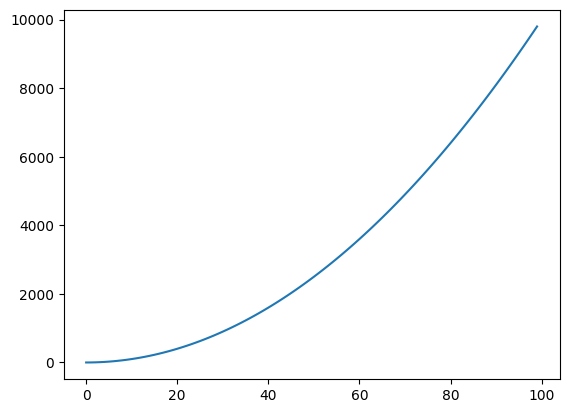

In [59]:
plt.plot(range(100), [i ** 2 for i in range(100)])

## 1. NumPy
NumPy - пакет, позволяющий хранить / выполнять быстрые операции над матрицами и тензорами в Python, решать системы линейных уравнений, находить псевдообратные матрицы и т.п.

### Работа с многомерными массивами

Массив в NumPy характеризуется:
* типом значений (dtype);
* числом осей (ndim);
* размерностью (shape) - то есть числом элементов по каждой оси.

Важно, что массивы в NumPy (объекты numpy.ndarray) обычно лежат в памяти линейно.

Массивы можно создавать из списков (python list).

Также, есть методы для создания пустых, единичных, заполненных константой матриц и др.

Например, создание матрицы *3x5*, заполненной единицами, выглядит следующим образом:

In [60]:
a = np.ones((3, 5))

Где `(3, 5)` (скобки обязательны) - кортеж (python tuple) с количествами элементов по осям.

In [61]:
print(f"Тип значений: {a.dtype}, число осей: {a.ndim}, размерности: {a.shape}")
print(a)

Тип значений: float64, число осей: 2, размерности: (3, 5)
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


Доступ к элементам массива осуществляется следующим образом:

In [62]:
print(f"Первый элемент первой строки: {a[0, 0]}")
print(f"Весь второй столбец: {a[:, 1]}")

Первый элемент первой строки: 1.0
Весь второй столбец: [1. 1. 1.]


Также можно изменять элементы, например:

In [63]:
a[:, 1] = [2, 3, 4]
print(a)

[[1. 2. 1. 1. 1.]
 [1. 3. 1. 1. 1.]
 [1. 4. 1. 1. 1.]]


Размерности массива можно менять, при этом память под новый массив не выделяется:

In [64]:
b = a.reshape((5, 3))
b[1, 1] = 0
print(b)

[[1. 2. 1.]
 [1. 0. 1.]
 [3. 1. 1.]
 [1. 1. 4.]
 [1. 1. 1.]]


Был изменён элемент матрицы `b`, но `a` тоже поменялась:

In [65]:
print(a)

[[1. 2. 1. 1. 0.]
 [1. 3. 1. 1. 1.]
 [1. 4. 1. 1. 1.]]


Чтобы избежать такого эффекта можно создать *глубокую* копию:

In [66]:
c = a.copy()
c[0, 4] = 1

In [67]:
print(a)
print(c)

[[1. 2. 1. 1. 0.]
 [1. 3. 1. 1. 1.]
 [1. 4. 1. 1. 1.]]
[[1. 2. 1. 1. 1.]
 [1. 3. 1. 1. 1.]
 [1. 4. 1. 1. 1.]]


Заметим, что поменялась только матрица **c**.

Существует также метод намеренного создания наоборот *слабой* копии: `view()`, чтобы избегать лишнего копирования данных, когда такое поведение допустимо.

При работе с матрицами больших размеров нужно стараться применять методы NumPy,
вместо написания своих циклов обработки на Python, поскольку, как правило, время работы готовых методов
в разы меньше, а код более выразительный. Так, например, искать индексы истинных (True) элементов матрицы можно с помощью `np.where`,
извлекать диагональ матрицы – с помощью `np.diag`, и т.д.
Список доступных методов можно посмотреть в [документации](https://docs.scipy.org/doc/numpy/reference/).

Важно, что произведение матриц по умолчанию выполняется **поэлементно**. Если размерности матриц совпадают лишь частично, применяются правила [трансляции (broadcasting)](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html):

In [68]:
A = np.array([[1, 2], [3, 4]])
x = np.array([5, 6]).reshape((1, 2))

print("A:\n", A)
print("x:\n", x, "\n")
print("A * x:\n", A * x, "\n")
print("x^T:\n", x.T, "\n")
print("A * x^T:\n", A * x.T)

A:
 [[1 2]
 [3 4]]
x:
 [[5 6]] 

A * x:
 [[ 5 12]
 [15 24]] 

x^T:
 [[5]
 [6]] 

A * x^T:
 [[ 5 10]
 [18 24]]


В первом случае `x` имеет размерность `(1, 2)` и рассматривается как строка. Поскольку размерности матрицы `A` и `x` не совпадают, и одна из размерностей `x` равна `1`, то результат `A * x` – поэлементное произведение каждой строки `A` на строку `x`.

Если умножить `A` на матрицу-столбец `x.T`, имеющую размерность `(2, 1)`, то результат `A * x` – поэлементное произведение каждого столбца `A` на столбец `x.T`.

Когда требуется использовать матричное произведение, применяют метод `dot` или оператор 'at' `@`:

In [69]:
print("x `dot` A:\n", x.dot(A), "\n")
print("A `dot` x.T:\n", A.dot(x.T))
print("A @ x.T:\n", A @ x.T)

x `dot` A:
 [[23 34]] 

A `dot` x.T:
 [[17]
 [39]]
A @ x.T:
 [[17]
 [39]]


Освежить знания по Python, а также узнать более подробно про NumPy и MatPlotLib можно [здесь](http://cs231n.github.io/python-numpy-tutorial/).

## 2. Работа с изображениями

Загрузим изображение с помощью библиотеки `imageio`:

In [70]:
image_path = os.path.join('images', 'kitten.jpg')  # Изображение лежит в папке "images"
kitten = imread(image_path)

Изображения представляются массивами numpy с размерностью `(высота, ширина, число каналов)`, где каналы - как правило компоненты RGB.

Убедимся в этом, взгялув на размерность загруженного изображения:

In [71]:
print(kitten.shape)

(150, 150, 3)


Для вывода изображения воспользуемся matplotlib:

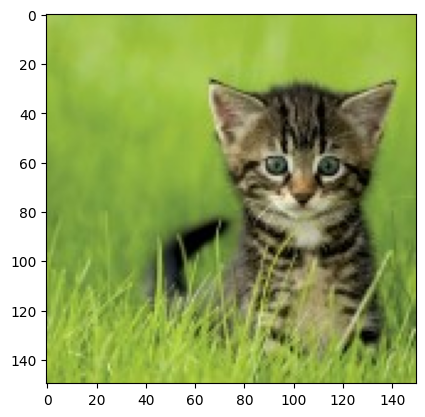

In [72]:
plt.imshow(kitten)

### Размерности изображений

Часто возникает проблема, когда изображение хранится в "сыром" виде с неправильным порядком каналов, например не `(высота, ширина, число каналов)`, а `(число каналов, высота, ширина)`.

Такая же проблема часто появляется при обработке изображений с помощью библиотек глубокого обучения: в Theano каналы идут до высоты, в Tensorflow - после ширины. Соответственно, может возникнуть задача переводить одно представление в другое.

Рассмотрим пример: дан numpy массив `data`, содержащий изображение, в котором каналы располагаются по горизонтали.

(150, 450)


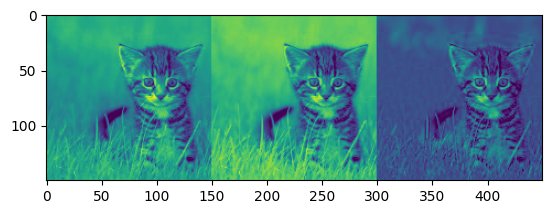

In [73]:
data = np.load(os.path.join("data", "shaped_incorrectly.npy"))
print(data.shape)
plt.imshow(data)

In [74]:
result = data.reshape((150, 3, 150)) # резрежем изображение на три квадрата по горизонтали
result = np.dstack([result[:, i, :] for i in range(3)]) # составим из трёх изображений (150, 150) одно (150, 150, 3)

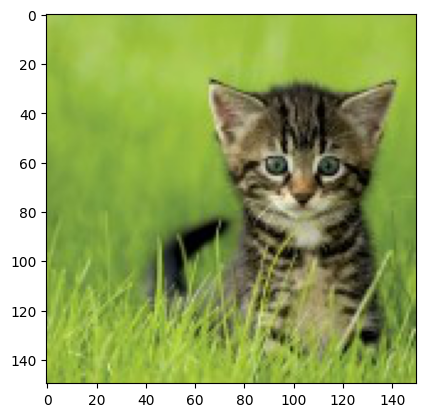

In [75]:
plt.imshow(result)

Поскольку задача типичная, существует более традиционый метод переставить оси `(150, 3, 150) -> (150, 150, 3)`: `np.swapaxes(result, -1, 1)`

### Пример задачи поиска описывающего прямоугольника

Рассмотрим простую задачу. Пусть дано изображение тёмного котёнка на фоне зелёной травы. Требуется найти описывающий прямоугольник (такой, чтобы весь котёнок оказался внутри).

Посмотрим на значения каналов:

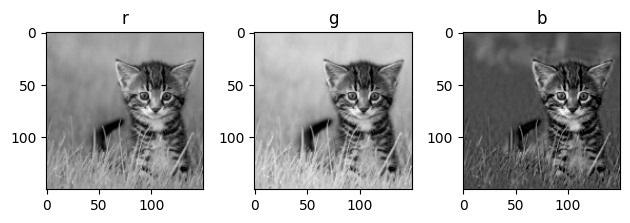

In [76]:
f, ax = plt.subplots(1, 3) # создадим сетку, в которую будем выводить картинки
f.set_dpi(100)             # повысим чёткость изображений
for i in range(3):
    ax[i].set_title("rgb"[i])                 # поставим подпись, соответствующую номеру канала
    ax[i].imshow(kitten[..., i], cmap="gray") # выведем значение канала с чёрно-белой цветовой схемой
f.tight_layout() # добавим границы, чтобы графики не наезжали друг на друга

Заметим, что синий канал самый тусклый, а зелёный ярче красного почти только на траве.

Значит для пикселей вокруг котёнка выполнено: $g > r$. Тогда пикселям котёнка соответствует обратное неравенство.

Проверим это:

Результат - матрица типа bool


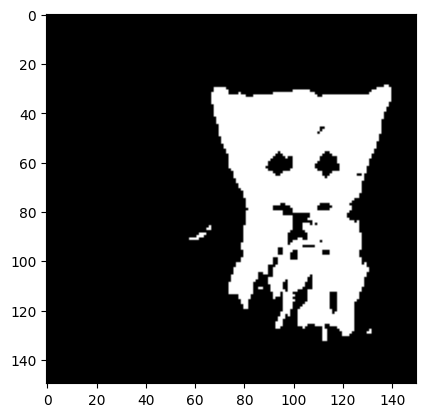

In [77]:
r = kitten[..., 0] # берём все значения по высоте и ширине, фиксируя только номер канала. Равносильно kitten[:, :, 0]
g = kitten[..., 1]
mask = r > g
plt.imshow(mask, cmap="gray")
print(f"Результат - матрица типа {mask.dtype}")

Переберём все строки чтобы найти верхнюю и нижнюю границы описывающиего прямоугольника:

In [78]:
%%time

top = mask.shape[0]
bottom = 0
for row in range(mask.shape[0]): # проходим по всем строкам
    if mask[row, :].sum() > 0:   # проверяем, что в строке есть хоть один элемент равный true 
        top = min(top, row)
        bottom = max(bottom, row)
print(f"Top: {top}, bottom: {bottom}")

Top: 29, bottom: 132
CPU times: total: 0 ns
Wall time: 2.99 ms


Аналогично поступим со столбцами:

In [79]:
%%time

left = mask.shape[1]
right = 0
for col in range(mask.shape[1]): # проходим по всем столбцам
    if mask[:, col].sum() > 0:
        left = min(left, col)
        right = max(right, col)
print(f"Left: {left}, right: {right}")

Left: 58, right: 139
CPU times: total: 0 ns
Wall time: 1.99 ms


Отметим, что более правильно в данном случае было бы не использовать циклы Python,
отдав предпочтение `np.where`.
Для этого можно воспользоваться вспомогательным методом `np.any`, позволяющим определить есть ли хотя бы один истинный (True) элемент в строке для каждой строки: `np.any(mask, axis=1)`, и аналогично для столбцов: `np.any(mask, axis=0)`.
Результат работы `np.where` - кортеж (tuple) с массивами индексов истинных (True) элементов. Каждый элемент кортежа соответствует индексам своей оси. Если применять `np.where` к массиву с одной осью (измерением), кортеж будет содержать всего один элемент.

Реализуем более эффективный поиск описывающего прямоугольника с помощью этих операций:

In [80]:
%%time

vertical_indices = np.where(np.any(mask, axis=1))[0]
top, bottom = vertical_indices[0], vertical_indices[-1]

horizontal_indices = np.where(np.any(mask, axis=0))[0]
left, right = horizontal_indices[0], horizontal_indices[-1]

print(f"Top: {top}, bottom: {bottom}")
print(f"Left: {left}, right: {right}")

Top: 29, bottom: 132
Left: 58, right: 139
CPU times: total: 0 ns
Wall time: 0 ns


Заметим, что время работы значительно уменьшилось.

Нарисуем описывающий прямоугольник поверх изображения с помощью `matplotlib.patches`:

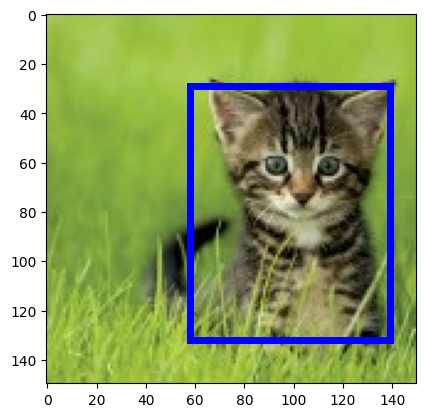

In [81]:
f, ax = plt.subplots(1, 1)
ax.imshow(kitten)

corner = (left, top)
height = bottom - top
width = right - left
ax.add_patch(Rectangle(corner, width, height, linewidth=5, edgecolor='b', facecolor='none'))

---
### Задание 1.

Дано изображение:

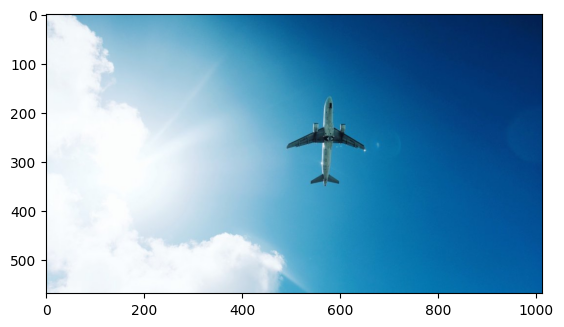

In [82]:
airplane = imread(os.path.join("images", "airplane.jpg"))
plt.imshow(airplane)

Посмотрим гистограммы интенсивностей пикселей внутри двух прямоугольников: с объектом и без него.

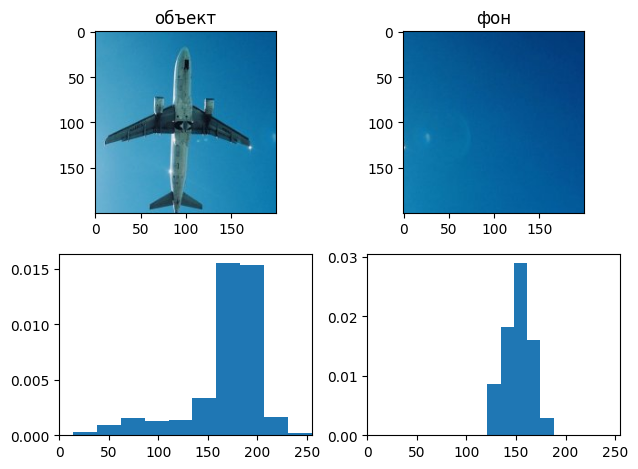

In [83]:
f, ax = plt.subplots(2, 2)  # создадим сетку, в которую будем выводить картинки
f.set_dpi(100)              # повысим чёткость изображений

airplane_object     = airplane[150:350, 480:680]
airplane_background = airplane[150:350, 650:850]

ax[0, 0].set_title("объект")
ax[0, 1].set_title("фон")
ax[0, 0].imshow(airplane_object, cmap="gray")
ax[0, 1].imshow(airplane_background, cmap="gray")
# выведем гистограмму синего канала куска изображения с объектом
ax[1, 0].hist(airplane_object[..., 2].ravel(), density=True)  # `density=True` - нормировка
ax[1, 1].hist(airplane_background[..., 2].ravel(), density=True)
for a in ax[1]: a.set_xlim([0, 255])

f.tight_layout()  # добавим границы, чтобы графики не наезжали друг на друга

*В коде `ravel` (англ. "запутывать") склеивает все размерности в одну. В данном случае `(150, 150) -> (22500,)`*

**Задача: подобрать два изображения, на которых объект:**
* имеет гистограмму, аналогичную гистограмме фона;
* имеет гистограмму, сильно отличающуюся от фона.

После выполнения задания не забудьте сохранить ответ, выполнив ячейку с функцией `add_to_answer`.
Не забудьте, что все добавленные изображения: входные данные и итоговый ответ - должны быть загружены в репозиторий.

In [84]:
task_1_answers = {}  # Исполнение этой ячейки сбрасывает ответ к заданию

Гистограммы близки:

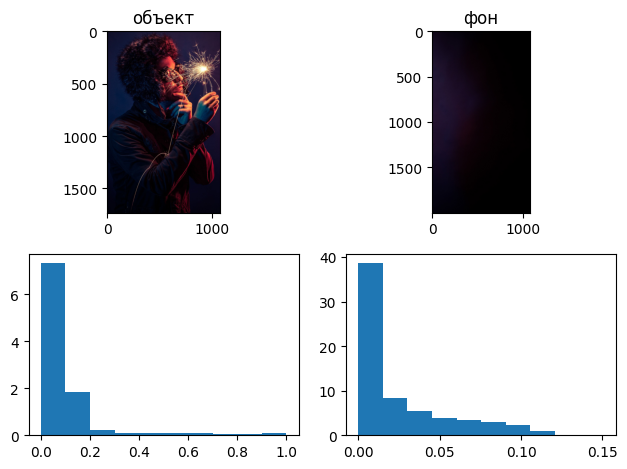

In [85]:
image_for_same_hists = os.path.join("images", "image01.jpg")  # Путь к добавленному изображению

img = imread(image_for_same_hists)
f, ax = plt.subplots(2, 2)
f.set_dpi(100)

# координаты можно менять
x_min_object = 270
x_max_object = 2000
y_min_object = 740
y_max_object = 1820

object_same_hists = img[x_min_object:x_max_object, y_min_object:y_max_object]

# координаты можно менять
x_min_background = 0
x_max_background = 2000
y_min_background = 0
y_min_background = 1920
y_max_background = 740
y_max_background = 3000

background_same_hists = img[x_min_background:x_max_background, y_min_background:y_max_background]

ax[0, 0].set_title("объект")
ax[0, 1].set_title("фон")
ax[0, 0].imshow(object_same_hists, cmap="gray")
ax[0, 1].imshow(background_same_hists, cmap="gray")
ax[1, 0].hist(rgb2gray(object_same_hists).flatten(), density=True)
ax[1, 1].hist(rgb2gray(background_same_hists).flatten(), density=True)

f.tight_layout()
filename_hists_same = os.path.join("images", "hist_same_comparison.png")
plt.savefig(filename_hists_same, dpi=100)

# Подготовка ответа
task_1_answers.update({
    "same_hists": {
        "image_name": image_for_same_hists,
        "object_loc": {
            "x_min": x_min_object,
            "x_max": x_max_object,
            "y_min": y_min_object,
            "y_max": y_max_object,
        },
        "background_loc": {
            "x_min": x_min_background,
            "x_max": x_max_background,
            "y_min": y_min_background,
            "y_max": y_max_background,
        },
        "image_result": filename_hists_same,
    },
})

Гистограммы различны:

In [ ]:
image_for_diff_hists = os.path.join("images", "<your image>")  # Путь к добавленному изображению

img = imread(image_for_diff_hists)
f, ax = plt.subplots(2, 2)
f.set_dpi(100)

# координаты можно менять
x_min_object = 150
x_max_object = 350
y_min_object = 480
y_max_object = 680

object_diff_hists = img[x_min_object:x_max_object, y_min_object:y_max_object]

# координаты можно менять
x_min_background = 150
x_max_background = 350
y_min_background = 650
y_max_background = 850

background_diff_hists = img[x_min_background:x_max_background, y_min_background:y_max_background]

ax[0, 0].set_title("объект")
ax[0, 1].set_title("фон")
ax[0, 0].imshow(object_diff_hists, cmap="gray")
ax[0, 1].imshow(background_diff_hists, cmap="gray")
ax[1, 0].hist(rgb2gray(object_diff_hists).flatten(), density=True)
ax[1, 1].hist(rgb2gray(background_diff_hists).flatten(), density=True)

f.tight_layout()
filename_hists_diff = os.path.join("images", "hist_different_comparison.png")
plt.savefig(filename_hists_diff, dpi=100)
f.tight_layout()

# Подготовка ответа
task_1_answers.update({
    "diff_hists": {
        "image_name": image_for_diff_hists,
        "object_loc": {
            "x_min": x_min_object,
            "x_max": x_max_object,
            "y_min": y_min_object,
            "y_max": y_max_object,
        },
        "background_loc": {
            "x_min": x_min_background,
            "x_max": x_max_background,
            "y_min": y_min_background,
            "y_max": y_max_background,
        },
        "image_result": filename_hists_diff,
    },
})

**Обязательно сохраните ответ, выполнив ячейку ниже!**

In [ ]:
add_to_answer("task_1", task_1_answers)

---

### Задание 2.

Ниже приведён пример поиска границ для изображения `lena`.

Требуется подобрать параметр `sigma` в фильтре `canny` так, чтобы границы начали выделяться адекватно (должны получаться длинные непрерывные кривые).

При желании можно менять другие параметры, но необходимо следить за сохранением формата ответа.

Дополнительно можно посмотреть доступные фильтры в [skimage.filters](http://scikit-image.org/docs/dev/api/skimage.filters.html)

In [ ]:
lena = imread(os.path.join("images", "lena.png"))

# Следует менять эти параметры
gaussian_sigma = 3
canny_sigma = 0.1
canny_low_threshold = 0.05
high_threshold = 0.20

# Применение фильтров
lena_gray = rgb2gray(rgba2rgb(lena))
lena_gray_blur = gaussian(lena_gray, sigma=gaussian_sigma)
lena_edges = canny(lena_gray_blur, sigma=canny_sigma, low_threshold=canny_low_threshold, high_threshold=high_threshold)

f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title("Lena")
ax[1].set_title("Edges")
ax[0].imshow(lena)
ax[1].imshow(lena_edges, cmap="gray")

filename_result = os.path.join("images", "lena_edges.png")
plt.savefig(filename_result, dpi=200)

# Сохраняем ответ
add_to_answer(
    "task_2",
    {
        "image_result": filename_result,
        "params": {
            "gaussian": {
                "sigma": gaussian_sigma,
            },
            "canny": {
                "sigma": canny_sigma,
                "low_threshold": canny_low_threshold,
                "high_threshold": high_threshold,
            },
        },
    },
)

---

## 3. Работа с видео

*Обратите внимание, что библиотека OpenCV по умолчанию не включает contrib-модули, содержащие большое число различных алгоритмов. В [репозитории](https://pypi.org/project/opencv-python/) есть готовые сборки, вроде `opencv-contrib-python`. Но ставить можно только **один** из пакетов, иначе могут возникать ошибки. Также, мы установили headless-версию (выполняя ячейку `pip install ...`), поскольку не планируем использовать GUI.*

В случае, если количество кадров велико, лучше производить обработку кадров сразу после загрузки.
Однако в данном случае кадров всего 249, поэтому загрузим все кадры видео в список:

In [ ]:
%%time

cap = cv2.VideoCapture(os.path.join("data", "poly_pin.mp4"))

frames_list = []
cur_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
while True:
    ready, frame = cap.read()
    if ready:
        downsampled = cv2.resize(frame, (0,0), fx=0.25, fy=0.25)
        frames_list.append(downsampled)
        cur_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)
    else: # не удалось загрузить кадр
        cap.set(cv2.CAP_PROP_POS_FRAMES, cur_frame - 1)

    if cap.get(cv2.CAP_PROP_POS_FRAMES) == cap.get(cv2.CAP_PROP_FRAME_COUNT):
        print(f"Все кадры загружены ({len(frames_list)} кадров)")
        break

Преобразуем кадры в массив `NumPy`:

In [ ]:
%%time

frames = np.stack(frames_list, axis=0)

Выведем первый и последний кадры:

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(frames[0])
ax[1].imshow(frames[-1])
ax[0].set_title("Первый кадр")
ax[1].set_title("Последний кадр");

Попробуем отследить положение значка на видео:

In [ ]:
%%time

# Задаём начальное положение значка
x, y, w, h = 500 // 4, 300 // 4, 400 // 4, 400 // 4  # двойной слэш означает целочисленное деление
bbox = (x, y, w, h)

frames_with_boxes = frames.copy()

# Создаём трекер
# The Tracker uses an algorithm which trains a classifier to separate the object from the background
tracker = cv2.TrackerMIL_create()
tracker.init(frames[0], bbox)
# Рисуем красный описывающий прямоугольник на изображении
cv2.rectangle(
    frames_with_boxes[0],
    (x, y),  # левый верхний угол
    (x + w, y + h),  # правый нижний угол
    (255, 0, 0),  # цвет
    20  # толщина линии
)

for frame_num, frame in enumerate(frames[1:], 1):
    (success, new_bbox) = tracker.update(frame)
    int_bbox = [int(i) for i in new_bbox]
    (nx, ny, nw, nh) = int_bbox
    cv2.rectangle(frames_with_boxes[frame_num], (nx, ny), (nx + nw, ny + nh), (255,0,0), 20)

Посмотрим на несколько кадров:

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
for i, f_num in enumerate([0, 150, -1]):
    ax[i].imshow(frames_with_boxes[f_num])

Понизим разрешение изображений, чтобы отобразить анимацию в ноутбуке:

In [ ]:
downsampled = []
ds = 4  # downsampling factor

for frame in frames_with_boxes:
    downsampled.append(cv2.resize(frame, (frame.shape[1] // ds, frame.shape[0] // ds)))

*Если вы запускаете код в `Jupyter Lab`, то режим `notebook` ниже будет недоступен и могут вознинкуть проблемы с отображением анимации (их можно проигнорировать и перейти к следующей части).*

In [ ]:
%matplotlib notebook

fig, ax = plt.subplots()
l = ax.imshow(downsampled[0])

def animate(i):
    l.set_data(downsampled[i])

ani = animation.FuncAnimation(fig, animate, frames=100) # len(frames)

HTML(ani.to_jshtml())

## 4. Работа с табличными данными: Pandas

Pandas - популярный пакет для анализа данных. С помощью него можно загружать датасеты различных форматов, производить отбор признаков, быстро строить графики по подмножествам данных и т.п.

Основных сущностей в Pandas две:
* DataFrame - таблица, включающая информацию о типе и названии каждого столбца, вместе с данными;
* Series - последовательность значений, например, значения столбца таблицы.

Загрузим датасет "Titanic":

In [ ]:
titanic = pd.read_csv(os.path.join("data", "titanic.csv"))

In [ ]:
titanic.head()  # выведем заголовки столбцов и первые 5 строк

Видно, что данные неправильно разбились на столбцы. Чтобы это исправить, поменяем разделитель:

In [ ]:
titanic = pd.read_csv(os.path.join("data", "titanic.csv"), delimiter="\t")
titanic.head()

Выведем основные статистики по столбцам, так будет легче понять их семантику:

In [ ]:
titanic.describe()

Из описания видно, что `PassengerId` - просто номер строки, который можно исключить, а `Pclass` - категориальная переменная. Избавимся от столбца `PassengerId`:

In [ ]:
titanic = titanic.drop(columns=["PassengerId"])

Посмотрим на гистограмму классов (`Pclass`):

In [ ]:
%matplotlib inline
titanic.groupby(titanic['Pclass']).Pclass.count().plot(kind='bar')

Попробуем найти правило, по которому можно определить принадлежит ли строка "выжившим".

Взглянем на гистограммы возраста "выживших" (тех, у кого `Survived = 1`) и не "выживших":

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title("Survived")
ax2.set_title("Not survived")
titanic[titanic.Survived == 1].Age.hist(ax=ax1, range=(0, 60))
titanic[titanic.Survived == 0].Age.hist(ax=ax2, range=(0, 60))

Поскольку гистограммы различны, скорее всего получится научиться отделять "выживших" от не "выживших".

Выберем все строки с возрастом от 20 до 60 - для этого воспользуемся методом `query`, и посмотрим отдельно на гистограммы возраста и "выживаемости" для мужчин:

In [ ]:
titanic_middle_age = titanic.query("Age > 20 and Age < 60")

In [ ]:
titanic_middle_age_male = titanic_middle_age.query("Sex == 'male'")
titanic_middle_age_male.query("Survived == 1").hist(column=["Age", "SibSp"])
plt.tight_layout()

In [ ]:
titanic_middle_age_male.query("Survived == 0").hist(column=["Age", "SibSp"])
plt.tight_layout()

Из этих гистограмм можно "на глаз" оценить множество почти точно "не выживших":

In [ ]:
titanic_middle_age_male.query("Age > 34 or SibSp > 0.1").Survived.hist()

---
### Задание 3.

Найдите аналогичный простой запрос (`query`), для заданного датафрейма `titanic_middle_age_female`, разделяющий множество по критерию `Survived` на два подмножества: "точно не выжившие" и "возможно выжившие", или наоборот. В самом запросе использовать признак `Survived` запрещается, требуется использовать другие признаки (например, `Age`, `SibSp` и прочие).

_Пояснение_: в множестве "точно не выживших" должны попасть только те объекты, для которых `Survived == 0`. В множество "возможно выживших" попадают все остальные объекты, у них может быть как `Survived == 0`, так и `Survived == 1`. Итоговая гистограмма должна иллюстрировать "чистоту" множества "точно не выживших" (или "точно выживших", если выбран этот вариант) - на ней должен быть один столбик (это означает, что все объекты в отделённом множестве принадлежат только одному классу).

In [ ]:
titanic_middle_age_female = titanic_middle_age.query("Sex == 'female'")
titanic_middle_age_female.query("Survived == 1").hist(column=["Age", "SibSp"])
plt.tight_layout()

In [ ]:
# Измените запрос query
query = "SibSp > 0"

titanic_middle_age_female.query(query).Survived.hist()
titanic_image_result = os.path.join("images", "titanic_survival.png")
plt.savefig(titanic_image_result)

# Сохраняем ответ
add_to_answer(
    "task_3",
    {
        "query": query,
        "image_result": titanic_image_result,
    },
)

---

## 4. Бинаризация

In [ ]:
img = imread(os.path.join("images", "horse.jpg"))
fig, ax = try_all_threshold(rgb2gray(img), figsize=(15, 15), verbose=False)
plt.show()

Посмотрим как можно улучшить результат с помощью предобработки:

In [ ]:
img_blur = gaussian(img, sigma=1.5, channel_axis=2)

fig, ax = try_all_threshold(rgb2gray(img_blur), figsize=(15, 15), verbose=False)
plt.show()

Рассмотрим результат бинаризации Оцу:

In [ ]:
img_blur_gray = rgb2gray(img_blur)
thresh_otsu = threshold_otsu(img_blur_gray)
res_otsu = img_blur_gray <= thresh_otsu

plt.imshow(res_otsu, cmap='gray')
plt.axis('off')

Видно, что в целом результат неплохой, но справа от объекта осталось несколько мелких пятен.

Посмотрим как можно избавиться от этих пятен:

Нужные морфологические операции реализованы в библиотеке [skimage.morphology](http://scikit-image.org/docs/dev/api/skimage.morphology.html). Подключим их

In [ ]:
res_otsu_enclosed = binary_opening(res_otsu, footprint=np.ones((5, 5)))

plt.imshow(res_otsu_enclosed, cmap='gray')
plt.axis('off')

От части пятен удалось избавиться. При этом видно, что вблизи гривы маска стала значительно более гладкой, из-за применения `binary_opening`.

*Если бы внутри объекта были дырки, их можно было бы закрасить по аналогии, используя метод* `binary_closing(img) = binary_erosion(binary_dilation(img))`.

Проведём анализ компонент связности на маске:

In [ ]:
def get_largest_component(mask):
    labels = sk_measure_label(mask) # разбиение маски на компоненты связности
    props = regionprops(labels) # нахождение свойств каждой области (положение центра, площадь, bbox, интервал интенсивностей и т.д.)
    areas = [prop.area for prop in props] # нас интересуют площади компонент связности

    print("Значения площади для каждой компоненты связности: {}".format(areas))
    largest_comp_id = np.array(areas).argmax() # находим номер компоненты с максимальной площадью

    print("labels - матрица, заполненная индексами компонент связности со значениями из множества: {}".format(np.unique(labels)))
    return labels == (largest_comp_id + 1) # области нумеруются с 1, поэтому надо прибавить 1 к индексу

plt.imshow(get_largest_component(res_otsu_enclosed), cmap='gray')
plt.axis('off')

---
### Задание 4.

Подберите изображение, на котором объект достаточно чётко отделим от фона. Выделите на нём объект при помощи бинаризации, морфологических операций и анализа компонент связности, по аналогии с примером выше.

Часть требований к итоговой маске:
- В маске не должно быть "дырок" - пользуйтесь морфологическим закрытием для их устранения;
- Маска не должна быть инвертированной - единицы в маске должны соответстовать объекту, а не фону (при отрисовке маски объекту должна соответствовать белая область, а не чёрная); при необходимости инвертированную маску `inverted_mask` можно свести к требуемой: `mask = 1 - inverted_mask`;
- В маске должна быть одна компонента связности (объект должен быть один) - можно пользоваться функцией `get_largest_component`.

In [ ]:
source_image_file = os.path.join("images", "<your image>")
first_image = imread(source_image_file)

# Напишите здесь код получения маски объекта с использованием бинаризации и морфологических операций


# Сохранение полученного изображения в файл
binarization_result_file = os.path.join("images", "binarization_result.png")
plt.savefig(binarization_result_file)

# Сохраняем результат
add_to_answer(
    "task_4",
    {
        "result_image": binarization_result_file,
        "source_image": source_image_file,
    },
)

---

**Локальные методы**

В случае, если объект отчётливо виден, но на изображении неравномерное освещение, полезны локальные методы.

Ниже приведены изображения, содержащие локальные пороговые значения:

In [ ]:
# загружаем картинку с изображением страницы, функция page была импортирована из библиотеки skimage:
# from skimage.data import page
page_img = page()

fig, ax = plt.subplots(1, 4, figsize=(15, 6))
ax[0].imshow(page_img, cmap='gray')
ax[1].imshow(threshold_local(page_img, 31, method='mean'), cmap='gray')
ax[2].imshow(threshold_local(page_img, 31, method='gaussian'), cmap='gray')
ax[3].imshow(threshold_local(page_img, 31, method='median'), cmap='gray')
for i in range(4): ax[i].set_axis_off()

for i, title in enumerate(["Input", "Mean", "Gaussian", "Median"]): ax[i].set_title(title)

Как видно, локальные пороговые значения состовляют что-то вроде карты освещения. Эту карту можно можно использовать для бинаризации. *Аналогичная идея используется и просто для выравнивания освещения (Single-Scale Retinex) на изображении.*

Выделим объекты с помощью полученных локальных пороговых значений:

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(15, 6))
ax[0].imshow(page_img >= threshold_otsu(page_img), cmap='gray')
ax[1].imshow(page_img >= threshold_local(page_img, 31, method='mean'), cmap='gray')
ax[2].imshow(page_img >= threshold_local(page_img, 31, method='gaussian'), cmap='gray')
ax[3].imshow(page_img >= threshold_local(page_img, 31, method='median'), cmap='gray')
for i in range(4): ax[i].set_axis_off()

for i, title in enumerate(["Otsu", "Local: Mean", "Local: Gaussian", "Local: Median"]): ax[i].set_title(title)

---
### Задание 5.

Подберите изображение, на котором обычная бинаризация даёт плохие результаты, когда как локальная позволяет получить результаты гораздо лучше. Найдите наиболее подходящие параметры метода `threshold_local`.

_Пояснение:_ Важно подобрать изображения так, чтобы локальная бинаризация давала _лучший_ результат по сравнению с обычной - в обычной бинаризации должно теряться много информации об объекте по сравнению с локальной (значительная часть объекта может быть выделена как фон или наоборот).

In [ ]:
source_image_file = os.path.join("images", "<your image>")
img_local = rgb2gray(imread(source_image_file))

fig, ax = plt.subplots(1, 4, figsize=(15, 6))
block_size = 31  # При желании этот параметр можно менять
ax[0].imshow(img_local >= threshold_otsu(img_local), cmap='gray')
ax[1].imshow(img_local >= threshold_local(img_local, block_size, method='mean'), cmap='gray')
ax[2].imshow(img_local >= threshold_local(img_local, block_size, method='gaussian'), cmap='gray')
ax[3].imshow(img_local >= threshold_local(img_local, block_size, method='median'), cmap='gray')

for i, title in enumerate(["Otsu", "Local: Mean", "Local: Gaussian", "Local: Median"]):
    ax[i].set_title(title)

local_bin_result_file = os.path.join("images", "local_binarization_result.png")
plt.savefig(local_bin_result_file, dpi=150)

# Сохраняем результат
add_to_answer(
    "task_5",
    {
        "result_image": local_bin_result_file,
        "source_image": source_image_file,
        "block_size": block_size,
    },
)

---